In [135]:
## load useful libraries
suppressWarnings(suppressPackageStartupMessages(library(rhdf5)))
suppressWarnings(suppressPackageStartupMessages(library(qvalue)))
suppressWarnings(suppressPackageStartupMessages(library(dplyr)))
suppressWarnings(suppressPackageStartupMessages(library(cowplot)))
suppressWarnings(suppressPackageStartupMessages(library(tidyverse)))
suppressWarnings(suppressPackageStartupMessages(library(ggbeeswarm)))
suppressWarnings(suppressPackageStartupMessages(library(ggthemes)))
suppressWarnings(suppressPackageStartupMessages(library(scater)))
suppressWarnings(suppressPackageStartupMessages(library(SingleCellExperiment)))
suppressWarnings(suppressPackageStartupMessages(library(edgeR)))
suppressWarnings(suppressPackageStartupMessages(library(limma)))
suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))
suppressWarnings(suppressPackageStartupMessages(library(ISLR)))
suppressWarnings(suppressPackageStartupMessages(library(GGally)))
suppressWarnings(suppressPackageStartupMessages(library(scran)))
suppressWarnings(suppressPackageStartupMessages(library(ComplexHeatmap)))
suppressWarnings(suppressPackageStartupMessages(library(circlize)))
suppressWarnings(suppressPackageStartupMessages(library(ggthemes)))

In [496]:
sce = readRDS("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20180618/sce_merged_afterqc_filt_allexpts.rds")

In [497]:
## HVGs (highly variable genes)
# library(scran)
sce = normalize(sce)
design = model.matrix(~ experiment, data = colData(sce))
alt.fit = trendVar(sce, design = design, use.spikes = FALSE)
alt.decomp = decomposeVar(sce, alt.fit)

Warning message in .local(object, ...):
“spike-in transcripts in 'ERCC' should have their own size factors”

In [498]:
top.100hvgs = rownames(alt.decomp[order(alt.decomp$bio, decreasing = TRUE),])[1:100]
top.200hvgs = rownames(alt.decomp[order(alt.decomp$bio, decreasing = TRUE),])[1:200]
top.500hvgs = rownames(alt.decomp[order(alt.decomp$bio, decreasing = TRUE),])[1:500]
top.1000hvgs = rownames(alt.decomp[order(alt.decomp$bio, decreasing = TRUE),])[1:1000]
top.2000hvgs = rownames(alt.decomp[order(alt.decomp$bio, decreasing = TRUE),])[1:2000]

In [499]:
hvgs <- rownames(alt.decomp[alt.decomp$FDR < 0.01,])

In [550]:
top.100hegs = names(rowSums(logcounts(sce))[order(rowSums(logcounts(sce)), decreasing = T)])[1:100]
top.200hegs = names(rowSums(logcounts(sce))[order(rowSums(logcounts(sce)), decreasing = T)])[1:200]
top.500hegs = names(rowSums(logcounts(sce))[order(rowSums(logcounts(sce)), decreasing = T)])[1:500]
top.1000hegs = names(rowSums(logcounts(sce))[order(rowSums(logcounts(sce)), decreasing = T)])[1:1000]
top.2000hegs = names(rowSums(logcounts(sce))[order(rowSums(logcounts(sce)), decreasing = T)])[1:2000]
top.4000hegs = names(rowSums(logcounts(sce))[order(rowSums(logcounts(sce)), decreasing = T)])[1:4000]

In [508]:
head(top.100hegs)

[1] "ENSG00000198804_MT-CO1" "ENSG00000198938_MT-CO3" "ENSG00000075624_ACTB"  
[4] "ENSG00000205542_TMSB4X" "ENSG00000229117_RPL41"  "ENSG00000198712_MT-CO2"

In [ ]:
######## alpha varqtls results

In [ ]:
## iPSC

In [390]:
alpha_ips_filename = "/nfs/leia/research/stegle/acuomo/singlecell_endodiff/20181119_alpha/ips/top_qtl_results_all.txt"
alpha_ips = read.csv(alpha_ips_filename, sep = "\t")
alpha_ips$q_value = qvalue(alpha_ips$empirical_feature_p_value)$qvalues
alpha_ips = alpha_ips[order(alpha_ips$q_value),]
#head(alpha_ips)
nrow(alpha_ips[alpha_ips$q_value < 0.1,]) # FDR 10%
nrow(alpha_ips[alpha_ips$q_value < 0.01,]) # FDR 1%

[1] 60

[1] 36

In [ ]:
## mesendo

In [389]:
alpha_mesendo_filename = "/nfs/leia/research/stegle/acuomo/singlecell_endodiff/20181119_alpha/mesendo/top_qtl_results_all.txt"
alpha_mesendo = read.csv(alpha_mesendo_filename, sep = "\t")
alpha_mesendo$q_value = qvalue(alpha_mesendo$empirical_feature_p_value)$qvalues
alpha_mesendo = alpha_mesendo[order(alpha_mesendo$q_value),]
# head(alpha_mesendo)
nrow(alpha_mesendo[alpha_mesendo$q_value < 0.1,]) # FDR 10%
nrow(alpha_mesendo[alpha_mesendo$q_value < 0.01,]) # FDR 1%

[1] 79

[1] 34

In [ ]:
## defendo

In [388]:
alpha_defendo_filename = "/nfs/leia/research/stegle/acuomo/singlecell_endodiff/20181119_alpha/defendo/top_qtl_results_all.txt"
alpha_defendo = read.csv(alpha_defendo_filename, sep = "\t")
alpha_defendo$q_value = qvalue(alpha_defendo$empirical_feature_p_value)$qvalues
alpha_defendo = alpha_defendo[order(alpha_defendo$q_value),]
# head(alpha_defendo)
nrow(alpha_defendo[alpha_defendo$q_value < 0.1,]) # FDR 10%
nrow(alpha_defendo[alpha_defendo$q_value < 0.01,]) # FDR 1%

[1] 75

[1] 38

In [ ]:
### across all (day x donor x experiment)

In [387]:
alpha_all_filename = "/nfs/leia/research/stegle/acuomo/singlecell_endodiff/20181119_alpha/all/top_qtl_results_all.txt"
alpha_all = read.csv(alpha_all_filename, sep = "\t")
alpha_all$q_value = qvalue(alpha_all$empirical_feature_p_value)$qvalues
alpha_all = alpha_all[order(alpha_all$q_value),]
# head(alpha_all)
nrow(alpha_all[alpha_all$q_value < 0.1,]) # FDR 10%
nrow(alpha_all[alpha_all$q_value < 0.01,]) # FDR 1%

[1] 187

[1] 83

In [ ]:
### across all (donor x experiment)

In [386]:
alpha_noday_filename = "/nfs/leia/research/stegle/acuomo/singlecell_endodiff/20181119_alpha/all_noday/top_qtl_results_all.txt"
alpha_noday = read.csv(alpha_noday_filename, sep = "\t")
alpha_noday$q_value = qvalue(alpha_noday$empirical_feature_p_value)$qvalues
alpha_noday = alpha_noday[order(alpha_noday$q_value),]
# head(alpha_noday)
nrow(alpha_noday[alpha_noday$q_value < 0.1,]) # FDR 10%
nrow(alpha_noday[alpha_noday$q_value < 0.01,]) # FDR 1%

[1] 144

[1] 75

In [ ]:
####### ASE interaction results

In [543]:
ase_folder = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/ase_env_interactions/selected_results_181023/"

In [544]:
test_filename = paste0(ase_folder,"pseudotimeandmodules.single_factor_test.all_leads.tsv")
pseudocorrect_filename = paste0(ase_folder,"pseudotimeandmodules.pseudotime_covariate_test.all_leads.tsv")
nonlinear_filename = paste0(ase_folder,"pseudotimeandmodules.combined_factor_test.all_leads.tsv")
quadratic_filename = paste0(ase_folder,"pseudotimeandmodules.quadratic_factor_test.all_leads.tsv")

In [545]:
test = read.csv(test_filename, sep = "\t")
pseudocorrect = read.csv(pseudocorrect_filename, sep = "\t")
nonlinear = read.csv(nonlinear_filename, sep = "\t")
quadratic = read.csv(quadratic_filename, sep = "\t")

In [546]:
length(unique(test$index))

[1] 4470

In [353]:
get_sign <- function(test, myfact, fdr){
    res = test
    res = res[res$n_cells > 500,]
    res = res[!(is.na(res$pval)),]
    res$corr_pval = p.adjust(res$pval, method = "BH")
    res[res$corr_pval < fdr & res$factor == myfact,]
} 

In [354]:
# set fdr threshold

In [391]:
fdr = 0.01

resp.corr.sign = get_sign(pseudocorrect, "respiration", fdr)
g1s.corr.sign = get_sign(pseudocorrect, "G1_S_transition", fdr)
sb.corr.sign = get_sign(pseudocorrect, "sterol_biosynthesis", fdr)
g2m.corr.sign = get_sign(pseudocorrect, "G2_M_transition", fdr)

pseudo.linear.sign = get_sign(test, "pseudotime", fdr)
pseudo.quadratic.sign = get_sign(quadratic, "pseudotime", fdr)

In [392]:
# choose interaction qtls set

In [520]:
pseudo_interaction_qtls = rbind(pseudo.linear.sign, pseudo.quadratic.sign)
other_interaction_qtls = rbind(resp.corr.sign, g1s.corr.sign, sb.corr.sign, g2m.corr.sign)
all_interaction_qtls = rbind(resp.corr.sign, g1s.corr.sign, sb.corr.sign, g2m.corr.sign, 
                             pseudo.linear.sign, pseudo.quadratic.sign)

In [521]:
# inters = pseudo_interaction_qtls
inters = other_interaction_qtls
# inters = all_interaction_qtls

In [523]:
nrow(inters)
inters = inters[inters$ensembl_gene_id %in% gsub("*_.*","",hvgs),]
nrow(inters)

[1] 425

[1] 187

In [395]:
alpha_ips$stage = "ips"
alpha_mesendo$stage = "mesendo"
alpha_defendo$stage = "defendo"
alphas = rbind(alpha_ips, alpha_mesendo, alpha_defendo)

In [396]:
# choose alpha results set

In [397]:
# alpha = alpha_ips
# alpha = alpha_mesendo
# alpha = alpha_defendo
# alpha = alphas (combine the above)
alpha = alpha_all
# alpha = alpha_noday

In [532]:
get_mat = function(alpha, inters, fdr, n_all_eqtls){
    inters$eqtl2 = paste0(inters$feature_id, "-", inters$snp_id)
    alpha.sign = alpha[alpha$q_value < fdr,] 
    alpha.sign$eqtl = paste0(alpha.sign$feature_id, "-", alpha.sign$snp_id)
    mergin = inner_join(alpha.sign, inters, by = c("ensembl_gene_id","snp_id"))
    mat11 = n_all_eqtls - length(unique(mergin$eqtl)) - length(unique(alpha.sign$eqtl)) - length(unique(inters$eqtl2))
    mat12 = length(unique(inters$eqtl2))
    mat21 = length(unique(alpha.sign$eqtl)) - length(unique(mergin$eqtl))
    mat22 = length(unique(mergin$eqtl))
    mat = rbind(c(mat11,mat12),
                c(mat21,mat22))
    mat
}

In [533]:
###

In [ ]:
fdr = 0.01

In [547]:
test1 = test[test$ensembl_gene_id %in% gsub("*_.*","",hvgs),]
n_eqtls = length(unique(test1$index))
inters = other_interaction_qtls
inters = inters[inters$ensembl_gene_id %in% gsub("*_.*","",hvgs),]
alpha = alpha_all
alpha = alpha[alpha$feature_id %in% hvgs,]
get_mat(alpha, inters, fdr, n_eqtls)
fisher.test(get_mat(alpha, inters, fdr, n_eqtls))

1827,126
16,9



	Fisher's Exact Test for Count Data

data:  get_mat(alpha, inters, fdr, n_eqtls)
p-value = 1.974e-05
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  3.104421 20.007876
sample estimates:
odds ratio 
  8.135707 


In [548]:
test1 = test[test$ensembl_gene_id %in% gsub("*_.*","",top.2000hvgs),]
n_eqtls = length(unique(test1$index))
inters = other_interaction_qtls
inters = inters[inters$ensembl_gene_id %in% gsub("*_.*","",top.2000hvgs),]
alpha = alpha_all
alpha = alpha[alpha$feature_id %in% top.2000hvgs,]
get_mat(alpha, inters, fdr, n_eqtls)
fisher.test(get_mat(alpha, inters, fdr, n_eqtls))

873,81
7,9



	Fisher's Exact Test for Count Data

data:  get_mat(alpha, inters, fdr, n_eqtls)
p-value = 2.304e-06
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  4.434064 44.747075
sample estimates:
odds ratio 
  13.77267 


In [549]:
test1 = test[test$ensembl_gene_id %in% gsub("*_.*","",top.2000hegs),]
n_eqtls = length(unique(test1$index))
inters = other_interaction_qtls
inters = inters[inters$ensembl_gene_id %in% gsub("*_.*","",top.2000hegs),]
alpha = alpha_all
alpha = alpha[alpha$feature_id %in% top.2000hegs,]
get_mat(alpha, inters, fdr, n_eqtls)
fisher.test(get_mat(alpha, inters, fdr, n_eqtls))

756,132
3,5



	Fisher's Exact Test for Count Data

data:  get_mat(alpha, inters, fdr, n_eqtls)
p-value = 0.002964
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  1.824826 61.979047
sample estimates:
odds ratio 
  9.505708 


In [551]:
test1 = test[test$ensembl_gene_id %in% gsub("*_.*","",top.4000hegs),]
n_eqtls = length(unique(test1$index))
inters = other_interaction_qtls
inters = inters[inters$ensembl_gene_id %in% gsub("*_.*","",top.4000hegs),]
alpha = alpha_all
alpha = alpha[alpha$feature_id %in% top.4000hegs,]
get_mat(alpha, inters, fdr, n_eqtls)
fisher.test(get_mat(alpha, inters, fdr, n_eqtls))

1606,177
10,7



	Fisher's Exact Test for Count Data

data:  get_mat(alpha, inters, fdr, n_eqtls)
p-value = 0.0008323
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  2.021197 18.711411
sample estimates:
odds ratio 
  6.339735 


In [ ]:
### alpha all combinations (day x donor x experiment)

In [552]:
fdr = 0.01
n_all_eqtls = 4470

In [407]:
fisher.test(get_mat(alpha_all, pseudo_interaction_qtls, fdr, n_all_eqtls))


	Fisher's Exact Test for Count Data

data:  get_mat(alpha_all, pseudo_interaction_qtls, fdr)
p-value = 0.05669
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.9116096 3.3496432
sample estimates:
odds ratio 
  1.814716 


In [553]:
get_mat(alpha_all, other_interaction_qtls, fdr, n_all_eqtls)
fisher.test(get_mat(alpha_all, other_interaction_qtls, fdr, n_all_eqtls))

4099,273
64,17



	Fisher's Exact Test for Count Data

data:  get_mat(alpha_all, other_interaction_qtls, fdr, n_all_eqtls)
p-value = 1.214e-05
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 2.157533 7.005690
sample estimates:
odds ratio 
  3.986375 


In [554]:
get_mat(alpha_all, all_interaction_qtls, fdr, n_all_eqtls)
fisher.test(get_mat(alpha_all, all_interaction_qtls, fdr, n_all_eqtls))

3781,587
60,21



	Fisher's Exact Test for Count Data

data:  get_mat(alpha_all, all_interaction_qtls, fdr, n_all_eqtls)
p-value = 0.002815
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.291996 3.792932
sample estimates:
odds ratio 
  2.253892 


In [ ]:
### alpha all combinations (no day)

In [410]:
fisher.test(get_mat(alpha_noday, pseudo_interaction_qtls, fdr, n_all_eqtls))


	Fisher's Exact Test for Count Data

data:  get_mat(alpha_noday, pseudo_interaction_qtls, fdr)
p-value = 0.0004809
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.555962 5.092662
sample estimates:
odds ratio 
  2.883952 


In [411]:
fisher.test(get_mat(alpha_noday, other_interaction_qtls, fdr, n_all_eqtls))


	Fisher's Exact Test for Count Data

data:  get_mat(alpha_noday, other_interaction_qtls, fdr)
p-value = 0.0006241
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.621620 6.099302
sample estimates:
odds ratio 
   3.26127 


In [412]:
fisher.test(get_mat(alpha_noday, all_interaction_qtls, fdr, n_all_eqtls))


	Fisher's Exact Test for Count Data

data:  get_mat(alpha_noday, all_interaction_qtls, fdr)
p-value = 0.0002067
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.594561 4.712411
sample estimates:
odds ratio 
  2.782824 


In [ ]:
### alpha ips

In [413]:
fisher.test(get_mat(alpha_ips, pseudo_interaction_qtls, fdr, n_all_eqtls))


	Fisher's Exact Test for Count Data

data:  get_mat(alpha_ips, pseudo_interaction_qtls, fdr)
p-value = 0.04309
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.8809548 5.6768982
sample estimates:
odds ratio 
  2.404179 


In [414]:
fisher.test(get_mat(alpha_ips, other_interaction_qtls, fdr, n_all_eqtls))


	Fisher's Exact Test for Count Data

data:  get_mat(alpha_ips, other_interaction_qtls, fdr)
p-value = 0.06325
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.7624698 6.6766184
sample estimates:
odds ratio 
  2.537044 


In [415]:
fisher.test(get_mat(alpha_ips, all_interaction_qtls, fdr, n_all_eqtls))


	Fisher's Exact Test for Count Data

data:  get_mat(alpha_ips, all_interaction_qtls, fdr)
p-value = 0.04269
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.9283875 5.0146201
sample estimates:
odds ratio 
  2.263312 


In [ ]:
### alpha mesendo

In [416]:
fisher.test(get_mat(alpha_mesendo, pseudo_interaction_qtls, fdr, n_all_eqtls))
fisher.test(get_mat(alpha_mesendo, other_interaction_qtls, fdr, n_all_eqtls))
fisher.test(get_mat(alpha_mesendo, all_interaction_qtls, fdr, n_all_eqtls))


	Fisher's Exact Test for Count Data

data:  get_mat(alpha_mesendo, pseudo_interaction_qtls, fdr)
p-value = 0.2476
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.4988524 4.3673994
sample estimates:
odds ratio 
  1.659399 



	Fisher's Exact Test for Count Data

data:  get_mat(alpha_mesendo, other_interaction_qtls, fdr)
p-value = 0.000963
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  1.813653 10.771451
sample estimates:
odds ratio 
  4.679913 



	Fisher's Exact Test for Count Data

data:  get_mat(alpha_mesendo, all_interaction_qtls, fdr)
p-value = 0.01843
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.156511 5.946630
sample estimates:
odds ratio 
  2.724162 


In [ ]:
### alpha defendo

In [417]:
fisher.test(get_mat(alpha_defendo, pseudo_interaction_qtls, fdr, n_all_eqtls))
fisher.test(get_mat(alpha_defendo, other_interaction_qtls, fdr, n_all_eqtls))
fisher.test(get_mat(alpha_defendo, all_interaction_qtls, fdr, n_all_eqtls))


	Fisher's Exact Test for Count Data

data:  get_mat(alpha_defendo, pseudo_interaction_qtls, fdr)
p-value = 0.1569
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.630984 4.562846
sample estimates:
odds ratio 
   1.86082 



	Fisher's Exact Test for Count Data

data:  get_mat(alpha_defendo, other_interaction_qtls, fdr)
p-value = 0.02546
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.995459 7.244479
sample estimates:
odds ratio 
  2.943914 



	Fisher's Exact Test for Count Data

data:  get_mat(alpha_defendo, all_interaction_qtls, fdr)
p-value = 0.1433
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.7088939 4.0682365
sample estimates:
odds ratio 
  1.803383 


In [477]:
PlotQQ = function(alpha, inters){
    df = alpha_all
    df$eqtl = paste0(df$feature_id,"-",df$snp_id)
    df1 = inner_join(df, inters, by = c("ensembl_gene_id","snp_id"))
    df$interacting = F
    df$interacting[df$eqtl %in% df1$eqtl] = T
    df[df$interacting,"pv_uniform"] = runif(dim(df[df$interacting,])[1], min = 0, max = 1)
    df[!(df$interacting),"pv_uniform"] = runif(dim(df[!(df$interacting),])[1], min = 0, max = 1)
    p = ggplot(df) + 
        geom_abline(slope = 1, intercept = 0, col = "firebrick") +
        geom_point(color = "cornflowerblue", alpha = 0.3, pch = 1, 
                   aes(x = sort(-log10(pv_uniform)), 
                       y = sort(-log10(p_value))), data = df[!(df$interacting),]) + 
        xlab("-log10(expected p-values)") + ylab("-log10(observed p-values)") + 
        theme_bw() + #ylim(c(0,25)) + xlim(c(0,4)) + 
        theme(panel.border = element_blank(), text = element_text(size = 14)) + 
        geom_point(color = "red", alpha = 0.4, pch = 1, 
                   aes(x = sort(-log10(pv_uniform)), 
                       y = sort(-log10(p_value))), 
                  data = df[df$interacting,])
    p
}

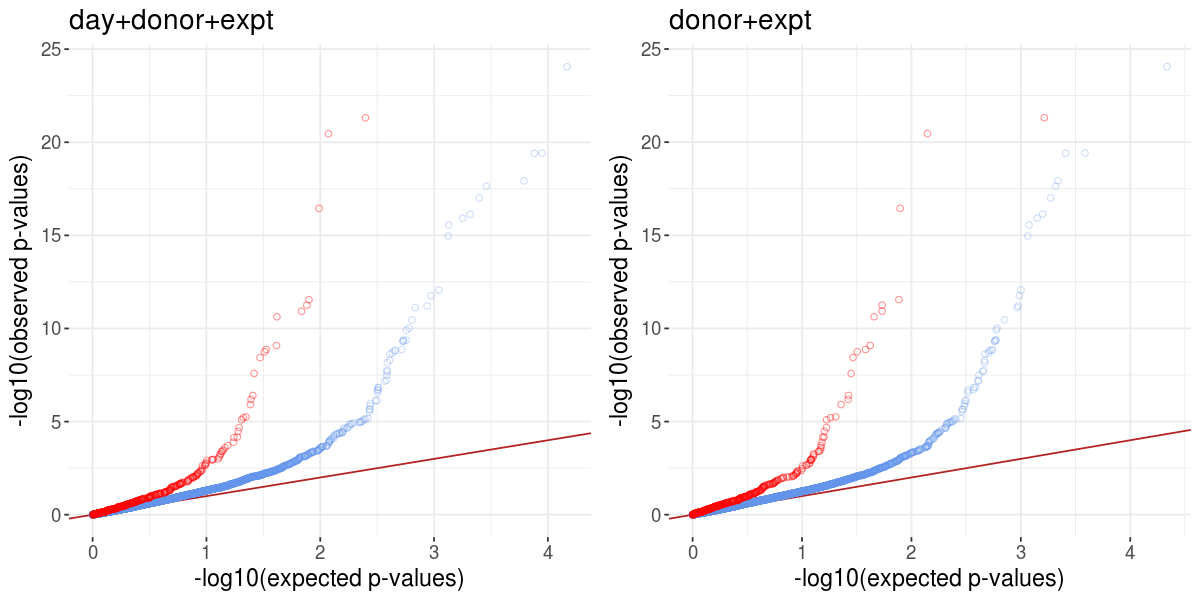

In [482]:
set.seed = 147
p1 = PlotQQ(alpha_all, all_interaction_qtls) + ggtitle("day+donor+expt")
p2 = PlotQQ(alpha_noday, all_interaction_qtls) + ggtitle("donor+expt")
options(repr.plot.width = 10, repr.plot.height = 5) 
plot_grid(p1, p2, ncol = 2)

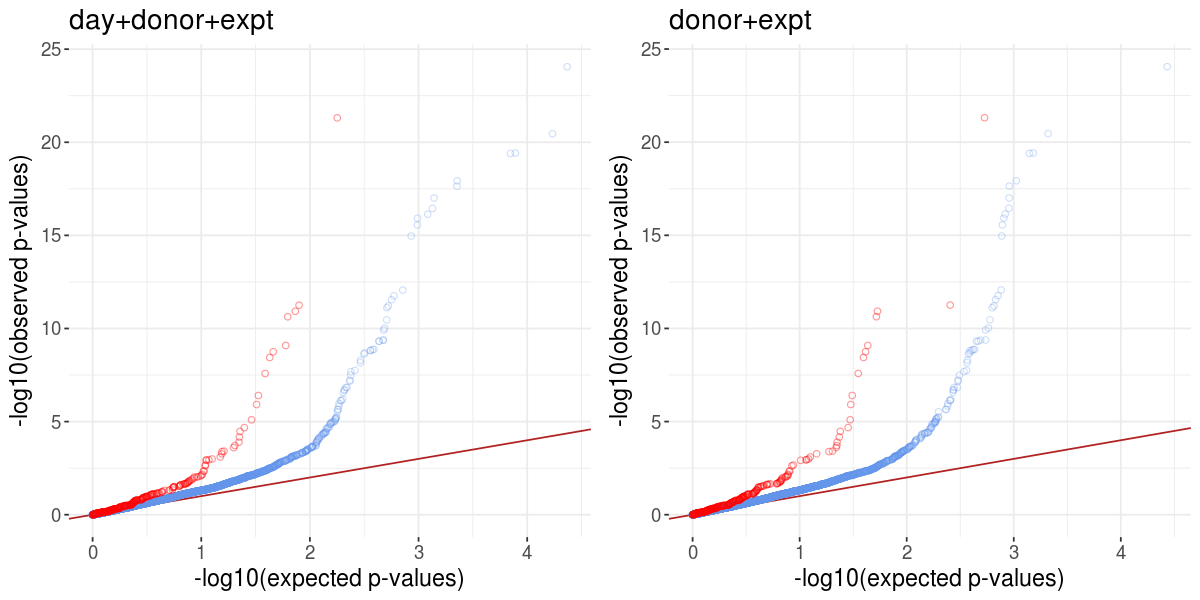

In [483]:
set.seed = 147
p1 = PlotQQ(alpha_all, pseudo_interaction_qtls) + ggtitle("day+donor+expt")
p2 = PlotQQ(alpha_noday, pseudo_interaction_qtls) + ggtitle("donor+expt")
options(repr.plot.width = 10, repr.plot.height = 5) 
plot_grid(p1, p2, ncol = 2)

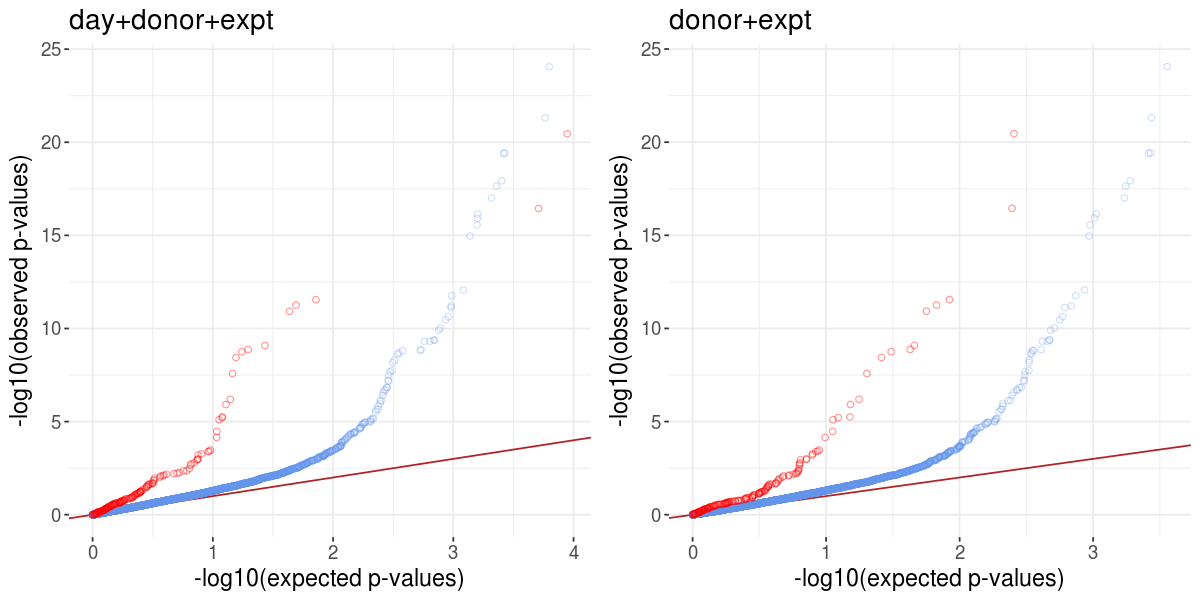

In [484]:
set.seed = 147
p1 = PlotQQ(alpha_all, other_interaction_qtls) + ggtitle("day+donor+expt")
p2 = PlotQQ(alpha_noday, other_interaction_qtls) + ggtitle("donor+expt")
options(repr.plot.width = 10, repr.plot.height = 5) 
plot_grid(p1, p2, ncol = 2)

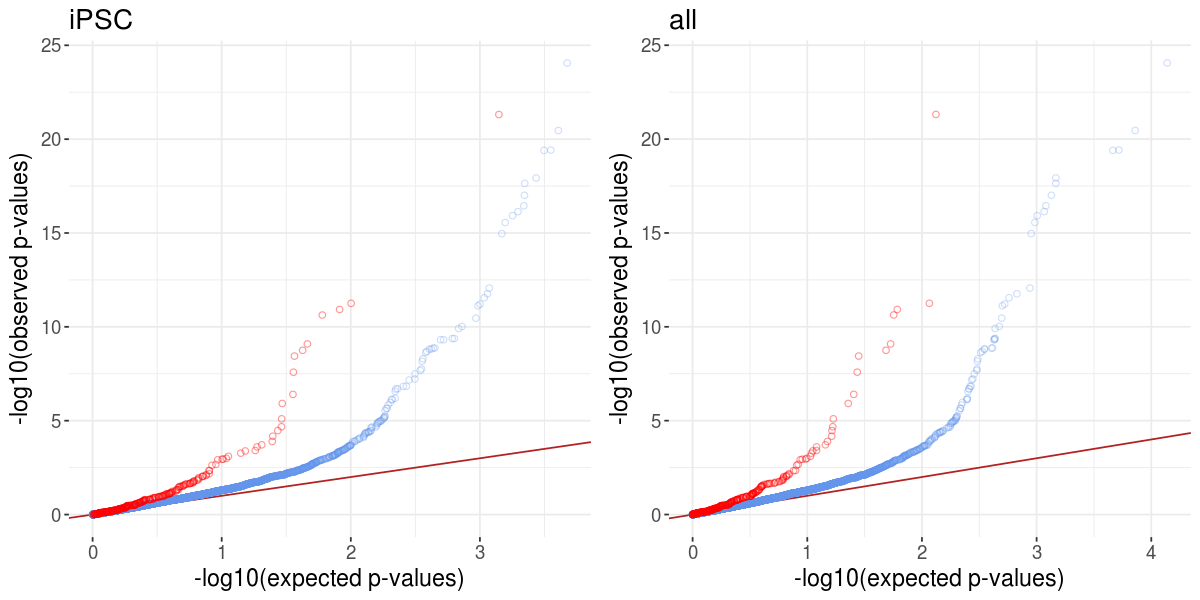

In [495]:
set.seed(172)
p1 = PlotQQ(alpha_ips, pseudo_interaction_qtls) + ggtitle("iPSC")
p2 = PlotQQ(alpha_noday, pseudo_interaction_qtls) + ggtitle("all")
options(repr.plot.width = 10, repr.plot.height = 5) 
plot_grid(p1, p2, ncol = 2)

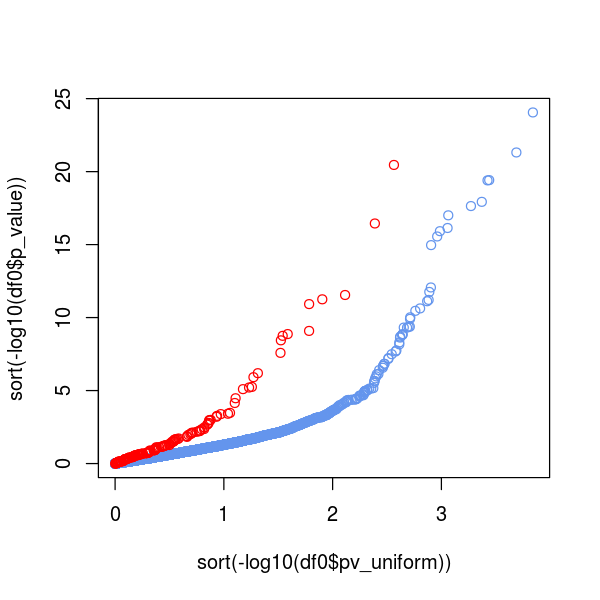

In [440]:
df = alpha_all
df$eqtl = paste0(df$feature_id,"-",df$snp_id)
df1 = inner_join(df, inters, by = c("ensembl_gene_id","snp_id"))
df$interacting = F
df$interacting[df$eqtl %in% df1$eqtl] = T
df0 = df[!(df$interacting),]
df1 = df[df$interacting,]
df0$pv_uniform = runif(dim(df0)[1], min = 0, max = 1)
df1$pv_uniform = runif(dim(df1)[1], min = 0, max = 1)
options(repr.plot.width = 5, repr.plot.height = 5) 
plot(sort(-log10(df0$pv_uniform)),sort(-log10(df0$p_value)), col = "cornflowerblue",)
points(sort(-log10(df1$pv_uniform)),sort(-log10(df1$p_value)), col = "red")

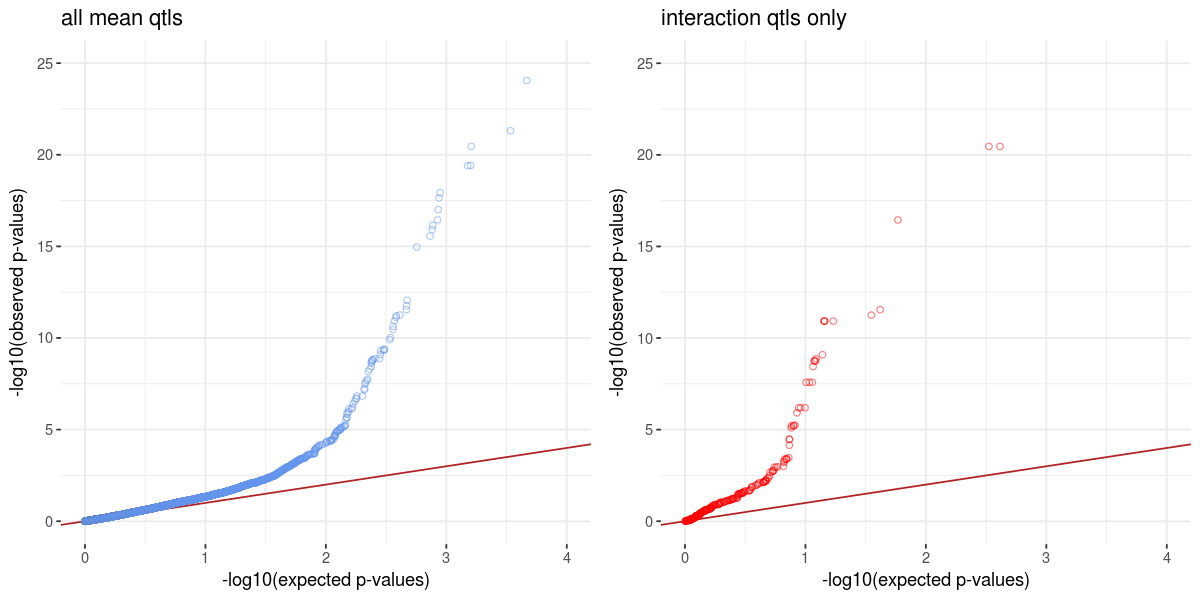

In [300]:
df = alpha_all
# nrow(df)
df$pv_uniform = runif(dim(df)[1], min = 0, max = 1)
p1 = ggplot(df) + 
        geom_abline(slope = 1, intercept = 0, col = "firebrick") +
        geom_point(color = "cornflowerblue", alpha = 0.5, pch = 1, 
                   aes(x = sort(-log10(pv_uniform)), y = sort(-log10(p_value)))) + 
        xlab("-log10(expected p-values)") + ylab("-log10(observed p-values)") + 
        theme_bw() + ylim(c(0,25)) + xlim(c(0,4)) + 
        theme(legend.position="none", panel.border = element_blank()) + ggtitle("all mean qtls")
df1 = inner_join(alpha_all, interaction_qtls, by = c("ensembl_gene_id","snp_id"))
# nrow(df1)
df1$pv_uniform = runif(dim(df1)[1], min = 0, max = 1)
p2 = ggplot(df1) + 
        geom_abline(slope = 1, intercept = 0, col = "firebrick") +
        geom_point(color = "red", alpha = 0.5, pch = 1, 
                   aes(x = sort(-log10(pv_uniform)), y = sort(-log10(p_value)))) + 
        xlab("-log10(expected p-values)") + ylab("-log10(observed p-values)") + 
        theme_bw() + ylim(c(0,25)) + xlim(c(0,4)) + 
        theme(legend.position="none", panel.border = element_blank()) + ggtitle("interaction qtls only")
options(repr.plot.width = 10, repr.plot.height = 5) 
# p1
library(cowplot)
plot_grid(p1, p2, ncol = 2)

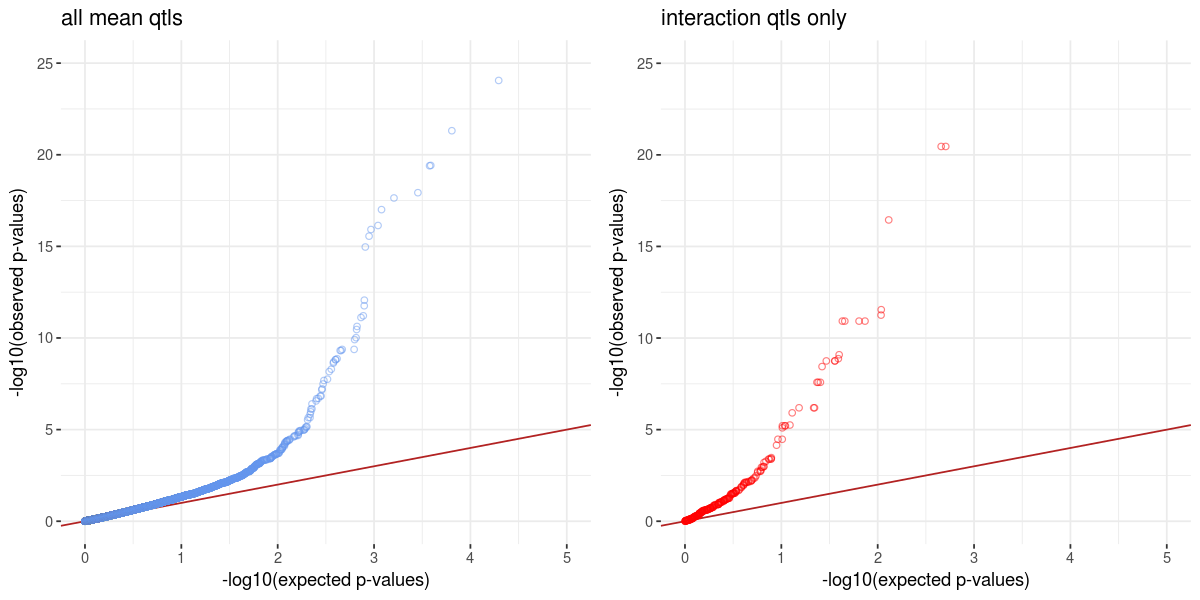

In [338]:
df = alpha_all
df$eqtl = paste0(df$feature_id,"-",df$snp_id)
df1 = inner_join(df, interaction_qtls, by = c("ensembl_gene_id","snp_id"))
df0 = df[!(df$eqtl %in% df1$eqtl),]
df0$pv_uniform = runif(dim(df0)[1], min = 0, max = 1)
p1 = ggplot(df0) + 
        geom_abline(slope = 1, intercept = 0, col = "firebrick") +
        geom_point(color = "cornflowerblue", alpha = 0.5, pch = 1, 
                   aes(x = sort(-log10(pv_uniform)), y = sort(-log10(p_value)))) + 
        xlab("-log10(expected p-values)") + ylab("-log10(observed p-values)") + 
        theme_bw() + ylim(c(0,25)) + xlim(c(0,5)) + 
        theme(legend.position="none", panel.border = element_blank()) + ggtitle("all mean qtls")
df1$pv_uniform = runif(dim(df1)[1], min = 0, max = 1)
p2 = ggplot(df1) + 
        geom_abline(slope = 1, intercept = 0, col = "firebrick") +
        geom_point(color = "red", alpha = 0.5, pch = 1, 
                   aes(x = sort(-log10(pv_uniform)), y = sort(-log10(p_value)))) + 
        xlab("-log10(expected p-values)") + ylab("-log10(observed p-values)") + 
        theme_bw() + ylim(c(0,25)) + xlim(c(0,5)) + 
        theme(legend.position="none", panel.border = element_blank()) + ggtitle("interaction qtls only")
options(repr.plot.width = 10, repr.plot.height = 5) 
# p1
library(cowplot)
plot_grid(p1, p2, ncol = 2)

In [296]:
interaction_qtls = rbind(resp.corr.sign, g1s.corr.sign, sb.corr.sign, g2m.corr.sign)
interaction_qtls$eqtl2 = paste0(interaction_qtls$feature_id,"-",interaction_qtls$snp_id)
length(unique(interaction_qtls$eqtl2))
length(unique(interaction_qtls$eqtl2))/4470

[1] 273

[1] 0.06107383

In [247]:
alpha_all.sign = alpha_all[alpha_all$q_value < 0.01,] 
alpha_all.sign$eqtl = paste0(alpha_all.sign$feature_id,"-",alpha_all.sign$snp_id)
mergin = inner_join(alpha_all.sign, interaction_qtls, by = c("ensembl_gene_id","snp_id"))

In [249]:
mat11 = 4470 - length(unique(mergin$eqtl)) - length(unique(alphas.sign$eqtl)) - length(unique(interaction_qtls$eqtl2))
mat12 = length(unique(interaction_qtls$eqtl2))
mat21 = length(unique(alphas.sign$eqtl)) - length(unique(mergin$eqtl))
mat22 = length(unique(mergin$eqtl))
mat = rbind(c(mat11,mat12),
            c(mat21,mat22))

In [250]:
mat

4096,273
67,17


In [251]:
fisher.test(mat)


	Fisher's Exact Test for Count Data

data:  mat
p-value = 2.018e-05
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 2.064548 6.666361
sample estimates:
odds ratio 
   3.80453 


In [252]:
fisher.test(mat, alternative = "greater")


	Fisher's Exact Test for Count Data

data:  mat
p-value = 2.018e-05
alternative hypothesis: true odds ratio is greater than 1
95 percent confidence interval:
 2.276536      Inf
sample estimates:
odds ratio 
   3.80453 


In [253]:
interaction_qtls = rbind(resp.corr.sign, g1s.corr.sign, sb.corr.sign, g2m.corr.sign, 
                         pseudo.linear.sign, pseudo.quadratic.sign)
interaction_qtls$eqtl2 = paste0(interaction_qtls$feature_id,"-",interaction_qtls$snp_id)
length(unique(interaction_qtls$eqtl2))
length(unique(interaction_qtls$eqtl2))/4470

[1] 587

[1] 0.1313199

In [254]:
mergin = inner_join(alpha_all.sign, interaction_qtls, by = c("ensembl_gene_id","snp_id"))

In [255]:
mat11 = 4470 - length(unique(mergin$eqtl)) - length(unique(alphas.sign$eqtl)) - length(unique(interaction_qtls$eqtl2))
mat12 = length(unique(interaction_qtls$eqtl2))
mat21 = length(unique(alphas.sign$eqtl)) - length(unique(mergin$eqtl))
mat22 = length(unique(mergin$eqtl))
mat = rbind(c(mat11,mat12),
            c(mat21,mat22))

In [256]:
mat

3778,587
63,21


In [257]:
fisher.test(mat)


	Fisher's Exact Test for Count Data

data:  mat
p-value = 0.005522
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.233233 3.595026
sample estimates:
odds ratio 
  2.144906 


In [262]:
unique(mergin$eqtl)

[1] "ENSG00000196126_HLA-DRB1-6_32597313_T_C" 
 [2] "ENSG00000206503_HLA-A-6_29812578_C_A"    
 [3] "ENSG00000204531_POU5F1-6_31128552_A_C"   
 [4] "ENSG00000128791_TWSG1-18_9365590_G_A"    
 [5] "ENSG00000165650_PDZD8-10_119029515_C_T"  
 [6] "ENSG00000233927_RPS28-19_8387207_G_A"    
 [7] "ENSG00000173401_GLIPR1L1-12_75737206_G_A"
 [8] "ENSG00000197728_RPS26-12_56401085_G_A"   
 [9] "ENSG00000116791_CRYZ-1_75189847_T_C"     
[10] "ENSG00000179344_HLA-DQB1-6_32634922_A_G" 
[11] "ENSG00000138757_G3BP2-4_76593147_C_A"    
[12] "ENSG00000170291_ELP5-17_7151111_A_C"     
[13] "ENSG00000106153_CHCHD2-7_56086054_A_C"   
[14] "ENSG00000204525_HLA-C-6_31239722_A_C"    
[15] "ENSG00000093072_CECR1-22_17680519_A_C"   
[16] "ENSG00000100376_FAM118A-22_45714489_T_C" 
[17] "ENSG00000169442_CD52-1_26618829_C_T"     
[18] "ENSG00000142089_IFITM3-11_320394_C_T"    
[19] "ENSG00000214078_CPNE1-20_34199977_G_A"   
[20] "ENSG00000111704_NANOG-12_7942472_A_G"    
[21] "ENSG00000196912_ANKRD36B-2_98162433_A_G"

In [259]:
head(alpha_all.sign[order(alpha_all.sign$q_value),],50)

,feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,hgnc_symbol,⋯,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_pvalue,q_value,eqtl
3387,ENSG00000204619_PPP1R11,6_29961580_A_G,8.826009e-25,-1.7135495,0.16671507,8.826009e-25,6,30034486,30038110,PPP1R11,⋯,1.0000000,1.0000000,6,29961580,G,1,0.11290323,0.36102961,9.241714e-21,ENSG00000204619_PPP1R11-6_29961580_A_G
4032,ENSG00000196126_HLA-DRB1,6_32597313_T_C,4.873909e-22,-1.4103337,0.14613535,4.873909e-22,6,32546546,32557625,HLA-DRB1,⋯,1.0000000,1.0000000,6,32597313,C,1,0.12903226,0.69042184,2.551735e-18,ENSG00000196126_HLA-DRB1-6_32597313_T_C
1746,ENSG00000206503_HLA-A,6_29812578_C_A,3.482917e-21,-1.5160711,0.16047976,3.482917e-21,6,29909037,29913661,HLA-A,⋯,1.0000000,1.0000000,6,29812578,A,1,0.13709677,0.46501999,1.215654e-17,ENSG00000206503_HLA-A-6_29812578_C_A
815,ENSG00000111215_PRR4,12_11282252_T_C,3.821341e-20,-0.8224364,0.08946361,3.821341e-20,12,10977559,11324212,PRR4,⋯,1.0000000,1.0000000,12,11282252,C,1,0.50000000,0.15335623,8.367637e-17,ENSG00000111215_PRR4-12_11282252_T_C
7686,ENSG00000076924_XAB2,19_7710920_G_A,3.995625e-20,1.0264594,0.11171526,3.995625e-20,19,7684411,7694451,XAB2,⋯,1.0000000,1.0000000,19,7710920,A,1,0.22580645,0.30908284,8.367637e-17,ENSG00000076924_XAB2-19_7710920_G_A
4033,ENSG00000204310_AGPAT1,6_32127477_C_A,1.175832e-18,-0.9522070,0.10799690,1.175832e-18,6,32135989,32145873,AGPAT1,⋯,1.0000000,1.0000000,6,32127477,A,1,0.36693548,0.56718758,2.052023e-15,ENSG00000204310_AGPAT1-6_32127477_C_A
120,ENSG00000204389_HSPA1A,6_31785228_G_C,2.287088e-18,-1.1363216,0.12998189,2.287088e-18,6,31783291,31785723,HSPA1A,⋯,1.0000000,1.0000000,6,31785228,C,1,0.22983871,0.30788071,3.421157e-15,ENSG00000204389_HSPA1A-6_31785228_G_C
7158,ENSG00000148300_REXO4,9_136288929_C_T,9.876100e-18,0.8008501,0.09338947,9.876100e-18,9,136271186,136283164,REXO4,⋯,1.0000000,1.0000000,9,136288929,T,1,0.33064516,0.41617900,1.292658e-14,ENSG00000148300_REXO4-9_136288929_C_T
8205,ENSG00000204531_POU5F1,6_31128552_A_C,3.570362e-17,-0.7648741,0.09077319,3.570362e-17,6,31132119,31148508,POU5F1,⋯,1.0000000,1.0000000,6,31128552,C,1,0.31854839,0.67864617,4.153918e-14,ENSG00000204531_POU5F1-6_31128552_A_C
7788,ENSG00000213588_ZBTB9,6_33407624_A_G,7.268468e-17,-1.0674852,0.12795619,7.268468e-17,6,33422356,33425325,ZBTB9,⋯,1.0000000,1.0000000,6,33407624,G,1,0.09274194,NA,7.610812e-14,ENSG00000213588_ZBTB9-6_33407624_A_G


In [301]:
alpha_noday_filename = "/nfs/leia/research/stegle/acuomo/singlecell_endodiff/20181119_alpha/all_noday/top_qtl_results_all.txt"
alpha_noday = read.csv(alpha_noday_filename, sep = "\t")
alpha_noday$q_value = qvalue(alpha_noday$empirical_feature_p_value)$qvalues
alpha_noday = alpha_noday[order(alpha_noday$q_value),]
head(alpha_noday)
nrow(alpha_noday[alpha_noday$q_value < 0.1,])

,feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,hgnc_symbol,⋯,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_pvalue,q_value
5272,ENSG00000204619_PPP1R11,6_29961580_A_G,5.108586e-29,-1.8914953,0.16918552,6.196511e-26,6,30034486,30038110,PPP1R11,⋯,124,0.8876235,0.7890830,6,29961580,G,1,0.11290323,0.3610296,6.315073e-22
7269,ENSG00000204389_HSPA1A,6_31785228_G_C,2.280344e-23,-1.3569875,0.13624355,2.280344e-23,6,31783291,31785723,HSPA1A,⋯,124,1.0000000,1.0000000,6,31785228,C,1,0.22983871,0.3078807,1.161988e-19
4075,ENSG00000204310_AGPAT1,6_32127477_C_A,5.183692e-23,-1.0878707,0.11013022,1.182567e-20,6,32135989,32145873,AGPAT1,⋯,124,0.8934175,0.9586572,6,32127477,A,1,0.36693548,0.5671876,4.017314e-17
3579,ENSG00000213588_ZBTB9,6_33407624_A_G,1.023044e-19,-1.4500873,0.15958749,1.023044e-19,6,33422356,33425325,ZBTB9,⋯,124,1.0000000,1.0000000,6,33407624,G,1,0.09274194,NA,2.606547e-16
4475,ENSG00000111215_PRR4,12_11282252_T_C,1.832465e-19,-0.8650652,0.09587486,1.832465e-19,12,10977559,11324212,PRR4,⋯,124,1.0000000,1.0000000,12,11282252,C,1,0.50000000,0.1533562,3.597008e-16
8137,ENSG00000206503_HLA-A,6_29812578_C_A,2.117686e-19,-1.4518072,0.16118653,2.117686e-19,6,29909037,29913661,HLA-A,⋯,124,1.0000000,1.0000000,6,29812578,A,1,0.13709677,0.4650200,3.597008e-16


[1] 144

In [306]:
interaction_qtls = rbind(resp.corr.sign, g1s.corr.sign, sb.corr.sign, g2m.corr.sign, 
                         pseudo.linear.sign, pseudo.quadratic.sign)
interaction_qtls$eqtl2 = paste0(interaction_qtls$feature_id,"-",interaction_qtls$snp_id)
length(unique(interaction_qtls$eqtl2))
length(unique(interaction_qtls$eqtl2))/4470

[1] 587

[1] 0.1313199

In [311]:
interaction_qtls = rbind(resp.corr.sign, g1s.corr.sign, sb.corr.sign, g2m.corr.sign)
interaction_qtls$eqtl2 = paste0(interaction_qtls$feature_id,"-",interaction_qtls$snp_id)
length(unique(interaction_qtls$eqtl2))
length(unique(interaction_qtls$eqtl2))/4470

[1] 273

[1] 0.06107383

In [312]:
alpha_noday.sign = alpha_noday[alpha_noday$q_value < 0.01,] 
alpha_noday.sign$eqtl = paste0(alpha_noday.sign$feature_id,"-",alpha_noday.sign$snp_id)
mergin = inner_join(alpha_noday.sign, interaction_qtls, by = c("ensembl_gene_id","snp_id"))

In [313]:
mat11 = 4470 - length(unique(mergin$eqtl)) - length(unique(alphas.sign$eqtl)) - length(unique(interaction_qtls$eqtl2))
mat12 = length(unique(interaction_qtls$eqtl2))
mat21 = length(unique(alphas.sign$eqtl)) - length(unique(mergin$eqtl))
mat22 = length(unique(mergin$eqtl))
mat = rbind(c(mat11,mat12),
            c(mat21,mat22))

In [314]:
mat

4100,273
71,13


In [315]:
fisher.test(mat)


	Fisher's Exact Test for Count Data

data:  mat
p-value = 0.002393
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.378011 5.086543
sample estimates:
odds ratio 
  2.748673 


In [309]:
mat

3777,587
62,22


In [310]:
fisher.test(mat)


	Fisher's Exact Test for Count Data

data:  mat
p-value = 0.001962
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.325450 3.800251
sample estimates:
odds ratio 
  2.282624 


Warning message:
“Removed 1 rows containing missing values (geom_point).”

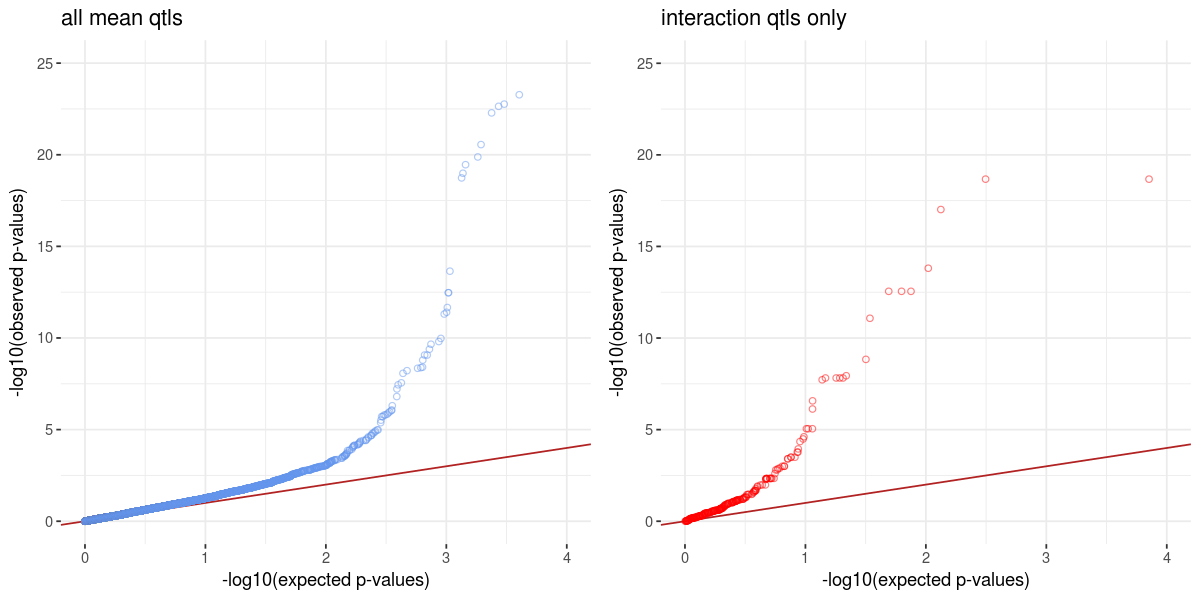

In [333]:
df = alpha_noday
df$eqtl = paste0(df$feature_id,"-",df$snp_id)
df1 = inner_join(df, interaction_qtls, by = c("ensembl_gene_id","snp_id"))
df0 = df[!(df$eqtl %in% df1$eqtl),]
df0$pv_uniform = runif(dim(df0)[1], min = 0, max = 1)
p1 = ggplot(df0) + 
        geom_abline(slope = 1, intercept = 0, col = "firebrick") +
        geom_point(color = "cornflowerblue", alpha = 0.5, pch = 1, 
                   aes(x = sort(-log10(pv_uniform)), y = sort(-log10(p_value)))) + 
        xlab("-log10(expected p-values)") + ylab("-log10(observed p-values)") + 
        theme_bw() + ylim(c(0,25)) + xlim(c(0,4)) + 
        theme(legend.position="none", panel.border = element_blank()) + ggtitle("all mean qtls")
df1$pv_uniform = runif(dim(df1)[1], min = 0, max = 1)
p2 = ggplot(df1) + 
        geom_abline(slope = 1, intercept = 0, col = "firebrick") +
        geom_point(color = "red", alpha = 0.5, pch = 1, 
                   aes(x = sort(-log10(pv_uniform)), y = sort(-log10(p_value)))) + 
        xlab("-log10(expected p-values)") + ylab("-log10(observed p-values)") + 
        theme_bw() + ylim(c(0,25)) + xlim(c(0,4)) + 
        theme(legend.position="none", panel.border = element_blank()) + ggtitle("interaction qtls only")
options(repr.plot.width = 10, repr.plot.height = 5) 
# p1
library(cowplot)
plot_grid(p1, p2, ncol = 2)

In [320]:
nrow(df)
nrow(df0)
nrow(df1)

[1] 10471

[1] 10471

[1] 238

In [ ]:
####

Warning message:
“Removed 1 rows containing missing values (geom_point).”

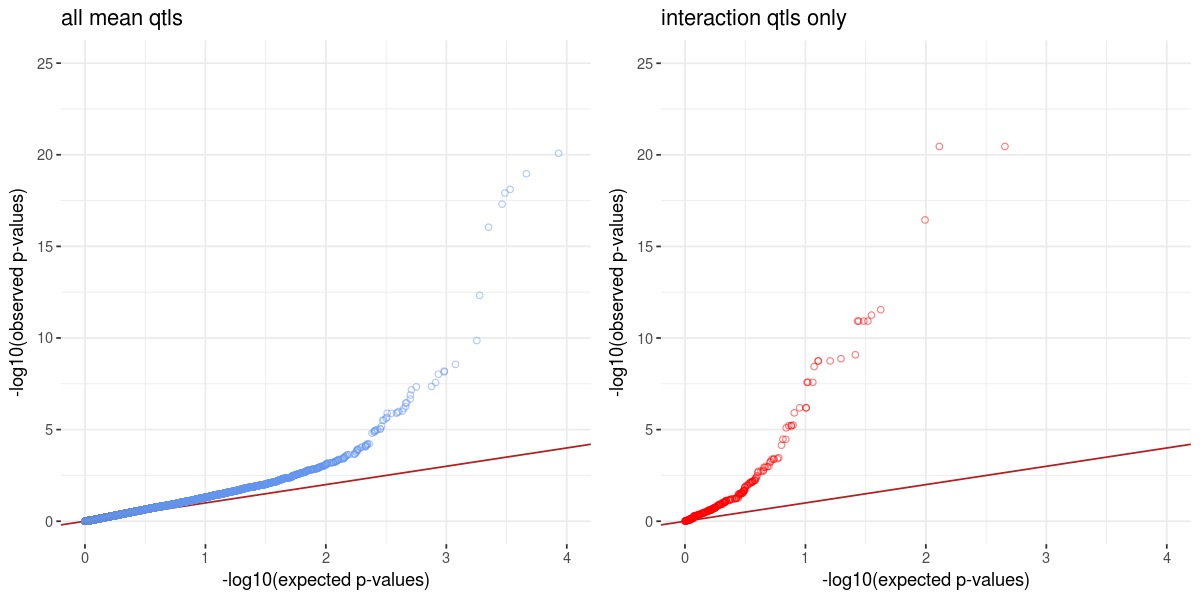

In [341]:
df = alpha_defendo
# nrow(df)
df$pv_uniform = runif(dim(df)[1], min = 0, max = 1)
p1 = ggplot(df) + 
        geom_abline(slope = 1, intercept = 0, col = "firebrick") +
        geom_point(color = "cornflowerblue", alpha = 0.5, pch = 1, 
                   aes(x = sort(-log10(pv_uniform)), y = sort(-log10(p_value)))) + 
        xlab("-log10(expected p-values)") + ylab("-log10(observed p-values)") + 
        theme_bw() + ylim(c(0,25)) + xlim(c(0,4)) + 
        theme(legend.position="none", panel.border = element_blank()) + ggtitle("all mean qtls")
df1 = inner_join(alpha_all, interaction_qtls, by = c("ensembl_gene_id","snp_id"))
# nrow(df1)
df1$pv_uniform = runif(dim(df1)[1], min = 0, max = 1)
p2 = ggplot(df1) + 
        geom_abline(slope = 1, intercept = 0, col = "firebrick") +
        geom_point(color = "red", alpha = 0.5, pch = 1, 
                   aes(x = sort(-log10(pv_uniform)), y = sort(-log10(p_value)))) + 
        xlab("-log10(expected p-values)") + ylab("-log10(observed p-values)") + 
        theme_bw() + ylim(c(0,25)) + xlim(c(0,4)) + 
        theme(legend.position="none", panel.border = element_blank()) + ggtitle("interaction qtls only")
options(repr.plot.width = 10, repr.plot.height = 5) 
# p1
library(cowplot)
plot_grid(p1, p2, ncol = 2)

In [ ]:
#### plot boxplots

In [263]:
genos = read.table("/hps/nobackup/hipsci/scratch/genotypes/imputed/2017-03-27/selectionAnna_July3rd.dosages.txt", header = T, row.names = 1)

In [264]:
input_files_dir = "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/variance/alpha_20191119/"

In [272]:
alphas = read.table(paste0(input_files_dir,"alphas_pheno.txt"), sep = "\t", row.names = 1, header = T)

In [273]:
head(alphas)

,heth_1.expt_12.day0,jogf_2.expt_12.day0,pelm_3.expt_12.day0,vass_1.expt_12.day0,wibj_2.expt_12.day0,zapk_3.expt_12.day0,oaqd_3.expt_18.day0,paab_4.expt_18.day0,sita_1.expt_18.day0,toss_3.expt_18.day0,⋯,pipw_5.expt_44.day3,qehq_3.expt_44.day3,toco_5.expt_44.day3,uilk_3.expt_44.day3,ciwj_2.expt_45.day3,hajc_1.expt_45.day3,hecn_3.expt_45.day3,kuco_1.expt_45.day3,liqa_1.expt_45.day3,tert_1.expt_45.day3
ENSG00000000003_TSPAN6,-0.3442969,-0.2561692,-0.9548249,-1.34176662,0.25255180,-1.0164727,-0.10464142,-0.58032824,0.11891761,-0.76777287,⋯,-0.46778962,-0.77829991,-1.5627428,-0.1721002,-0.5528760,-0.79571075,-0.68755057,-0.6823274,-0.5420599,-0.6358766
ENSG00000000419_DPM1,-1.0514935,-0.2041174,-0.3276868,-0.22923586,0.18026564,-0.7068602,0.04927355,0.15825603,0.02826850,-0.95107324,⋯,-0.22717253,0.13713439,-0.5639113,-0.7386641,-0.1280112,-0.12104721,0.27571550,-0.5952411,-0.4243883,-0.2920847
ENSG00000000457_SCYL3,-0.4788146,-0.7450249,-0.4537243,-0.27583950,-0.05931901,-0.2502215,-0.04891225,0.89742076,-0.12963603,0.09044089,⋯,0.03690936,-0.06362677,1.4233689,0.9690594,-0.1015759,0.10179401,-0.09009097,-0.2322684,0.3109683,0.1313184
ENSG00000000460_C1orf112,-0.7312819,-0.2904255,1.0291748,0.03240118,-0.22764528,0.1665379,-0.67332830,0.55970130,-0.48053932,-0.12481105,⋯,-1.17220535,-1.56656639,-0.7594919,0.1320565,-0.7227744,-0.86116682,-1.05915842,-1.5106282,-0.8159853,-0.4442065
ENSG00000001036_FUCA2,-1.0857484,-0.6982946,-0.5535402,-1.05484372,-0.68306766,-1.1752613,-0.50526550,-0.71218910,0.29154267,-1.13094919,⋯,-0.06442643,-0.36455497,-0.4597977,-0.5270732,-0.5966388,-1.29413911,-0.72223814,-1.2819277,-0.6988986,-1.0008164
ENSG00000001084_GCLC,-0.2265324,-0.4693774,-0.1098633,-0.21712199,0.69784160,-0.7496548,-0.15165364,0.07095915,0.03665637,0.35903799,⋯,-0.48029782,-0.54233564,-0.7935453,0.2506322,0.6754931,0.07295432,-0.32036516,0.4714210,-0.3444726,-0.1273048


In [275]:
alphas.pcs = read.table(paste0(input_files_dir,"alphas_covs.txt"), sep = "\t", row.names = 1, header = T)
head(alphas.pcs)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
heth_1-expt_12-day0,-21.19713,15.878011,-0.9965958,0.6220882,-12.809365,2.580559,-20.930595,10.030162,-7.2962699,7.129577
jogf_2-expt_12-day0,-26.49349,7.475813,-1.6065072,4.1144629,-13.321893,5.090616,-17.929925,18.923252,-7.3908873,2.127327
pelm_3-expt_12-day0,-24.33786,12.058952,2.1981949,-1.1502685,-17.159151,3.699356,-38.352969,18.100103,-6.9255682,8.280914
vass_1-expt_12-day0,-19.20321,6.991338,0.9286990,-2.2234611,-15.091141,3.682884,-43.777057,-2.180879,-11.3871820,11.848052
wibj_2-expt_12-day0,-16.16141,3.172899,-6.1336847,2.9186869,-9.489744,1.597879,-4.250552,4.878086,0.5537795,4.924641
zapk_3-expt_12-day0,-23.98590,4.679576,-1.5694202,1.4983728,-11.039238,4.158456,-17.487872,14.497551,-6.3660481,2.621105


In [281]:
alphas.samples = read.table(paste0(input_files_dir,"alphas_samples.txt"), sep = "\t", row.names = 1)
head(alphas.samples)

V2,V3
HPSI0214i-heth_1,heth_1-expt_12-day0
HPSI1013i-jogf_2,jogf_2-expt_12-day0
HPSI0214i-pelm_3,pelm_3-expt_12-day0
HPSI0114i-vass_1,vass_1-expt_12-day0
HPSI0214i-wibj_2,wibj_2-expt_12-day0
HPSI0114i-zapk_3,zapk_3-expt_12-day0


In [ ]:
i = 1
qtl = mergin[i,]
# snp_name = "rs9648854"
gene = qtl$feature
snp = qtl$snp_id
df0 = as.data.frame(cbind(sce$donor_short_id, sce$experiment, sce$day, logcounts(sce)[gene,],
                          assay(sce, "exprs_limmabatch_correct")[gene,]))
colnames(df0) <- c("donor","expt","day","exprs","norm_exprs")
df0 <- dplyr::mutate(df0, donor_expt_day = paste0(donor, "-", expt, "-", day))
df1 <- df0 %>% group_by(donor_expt_day) %>% summarize(mean.exprs.sc = mean(as.numeric(exprs)))
df1 <- as.data.frame(df1)
colnames(df1) <- c("donor.expt.day", "mean.exprs.sc")

df1$donor <- gsub("*-.*","",df1$donor.expt.day)
df1$expt <- gsub("*-.*","",gsub(".*-e","e",df1$donor.expt.day))
df1$day <- gsub(".*-","",df1$donor.expt.day)

# select snp
geno = genos[rownames(genos) == snp,]
df2 = as.data.frame(t(rbind(geno,colnames(geno))))
df2[,2] = gsub("\\.","-",df2[,2])
df2[,2] = gsub(".*-","",df2[,2])
colnames(df2) = c("dosages","donor")
df2 <- dplyr::mutate(df2, genotypes = round(as.numeric(dosages)))

# make dataframe
df = as.data.frame(left_join(df1, df2, by = "donor"))
col = "coral"
df$alleles = c()
df$alleles[df$genotypes == 0] <- "CC"
df$alleles[df$genotypes == 1] <- "CT"
df$alleles[df$genotypes == 2] <- "TT"
ggplot(df[df$genotypes %in% c(0,1,2),], aes(x = as.factor(alleles), y = as.numeric(mean.exprs.sc))) + 
        geom_violin(col = col)+
        geom_quasirandom(aes(x = as.factor(alleles), y = as.numeric(mean.exprs.sc)), col = col) +
        geom_boxplot(width = 0.1, col = col) +
        labs(y = "average expression", x = "genotypes")